In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astrocut import fits_cut
import dLux.utils as dlu

cmap = plt.get_cmap('inferno')
cmap.set_bad('k')

import warnings; warnings.simplefilter('ignore')


You will have used `bash ../data/MAST_2024-07-03T0023` to download the datasets - this should create a directory `..data/MAST_2024-07-03T0023/HST/` with many subdirectories, each of which contains a dataset. Let's explore one of these.

In [2]:
ddir = '../data/MAST_2024-07-03T0023-1/'
fname = ddir + 'HST/n8yj27020/n8yj27020_mos.fits'
#fname = ddir + 'HST/n8yj65010/n8yj65010_mos.fits'
fname = ddir + 'HST/n9nk01010/n9nk01010_mos.fits'

# n8yj: 2 3 ~6 ~27 38 ~40 ~49 ~~56 65
# n9nk: 1 ~~4 ~5 14 ~~15

# 16 is good binary

prog = 'n8yj'#'n9nk'#'n8yj'

num = 65#65

wv = '2'

fname = ddir + f'HST/{prog}{num:02}0{wv}0/{prog}{num:02}0{wv}0_mos.fits'

ddir = '../data/MAST_2024-07-07T03_17_36.223Z/'
fname = ddir + 'HST/n8ku01050_mos.fits'

#ddir = '../data/MAST_2024-07-11T09_26_05.575Z/'
#fname = ddir + 'HST/N43C02020/n43c02020_mos.fits'

ddir = '../data/MAST_2024-07-11T09_26_05.575Z/'
fname = ddir + 'HST/N43C03020/n43c03020_mos.fits'
fname = ddir + 'HST/N43CA5010/n43ca5010_mos.fits'

ddir = '../data/MAST_2024-07-07T03_17_36.223Z/'
fname = ddir + 'HST/n8ku01050_mos.fits'

data = fits.getdata(fname, ext=1)
data.shape
print(np.max(data))

err = fits.getdata(fname, ext=2)
print(np.max(err))

info = fits.getdata(fname, ext=3)

bad = np.asarray((err==0.0) | (info&256) | (info&64) | (info&32))

7968.6494
1.0613687


In [3]:
data.flatten()

array([0.09051378, 0.01311984, 0.13708542, ..., 0.03939141, 0.31232256,
       0.03506854], dtype='>f4')

(array([1.3000e+01, 2.7000e+01, 5.1000e+01, 6.1000e+01, 5.4000e+01,
        2.7000e+01, 1.5000e+01, 1.4000e+01, 7.0000e+00, 8.0000e+00,
        8.0000e+00, 2.1100e+02, 4.0090e+03, 8.2340e+03, 1.2002e+04,
        1.4866e+04, 1.0214e+04, 4.9640e+03, 2.7340e+03, 1.7480e+03,
        1.3610e+03, 1.1260e+03, 7.7200e+02, 5.7700e+02, 4.3100e+02,
        3.4000e+02, 2.8700e+02, 2.5700e+02, 1.5300e+02, 9.3000e+01,
        6.9000e+01, 5.2000e+01, 5.9000e+01, 3.9000e+01, 3.7000e+01,
        1.5000e+01, 7.0000e+00, 1.6000e+01, 8.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 4.6000e+01,
        1.4000e+01, 0.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        6.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 8.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

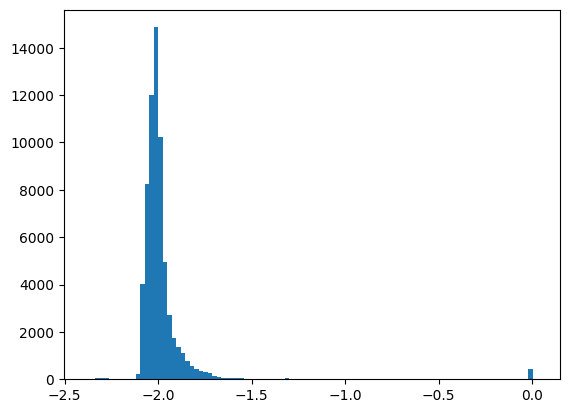

In [4]:
err = np.where(bad, 1, np.asarray(err, dtype=float))
data = np.where(bad, 1, np.asarray(data, dtype=float))
plt.hist(np.log10(err.flatten()), bins=100)

In [5]:
#plt.hist(np.log10((data/err).flatten()), bins=100)

In [6]:
hdul =fits.open(fname)
hdul.info()
hdul.close()

Filename: ../data/MAST_2024-07-07T03_17_36.223Z/HST/n8ku01050_mos.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     323   ()      
  1  SCI           1 ImageHDU       143   (256, 256)   float32   
  2  ERR           1 ImageHDU        71   (256, 256)   float32   
  3  DQ            1 ImageHDU        71   (256, 256)   int16   
  4  SAMP          1 ImageHDU        71   (256, 256)   int16   
  5  TIME          1 ImageHDU        71   (256, 256)   float32   


([], [])

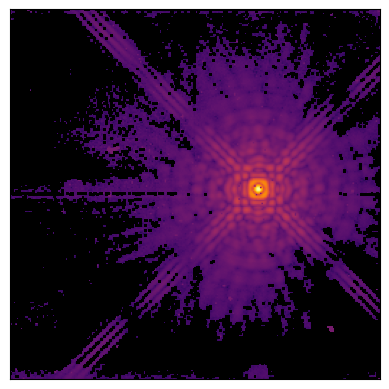

In [7]:
plt.imshow(data**0.125,cmap=cmap,origin='lower')
plt.xticks([])
plt.yticks([])


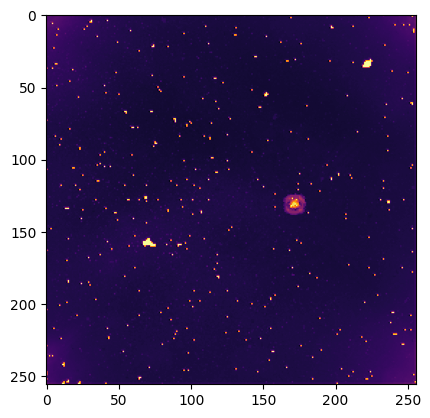

In [8]:
plt.imshow(err**0.125,cmap=cmap)

In [9]:
hdr = fits.getheader(fname, ext=0) # this is the overall header - with lots of metadata
print(hdr)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                   16 / Bits per pixel                                 NAXIS   =                    0 / Number of axes                                 EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        IRAF-TLM= '2010-11-20T02:56:42' / Time of last modification                     NEXTEND =                    5 / Number of standard extensions                  DATE    = '2010-11-20T02:56:42' / date this file was written (yyyy-mm-dd)       FILENAME= 'n8ku01050_mos.fits' / name of file                                   FILETYPE= 'SCI      '          / type of data found in data file                                                                                                TELESCOP= 'HST'                / telescope used to acquire data                 INSTRUME= 'NICMOS'             / identif

In [10]:
metadata = { # this is the main subset of metadata we care about from the header 
    'tel'    : hdr['TELESCOP'],         # telescope - should be HST
    'fname'  : hdr['FILENAME'],         # original file name
    'ap'     : hdr['APERTURE'],
    'odate'  : hdr['DATE-OBS'],         # UTC date of observation
    'otime'  : hdr['TIME-OBS'],         # UTC time of observation
    'tint'   : hdr['EXPTIME' ],         # integration time (sec)
    'filter' : hdr['FILTER'],           # filter name - should be F110W, or F170W
    'RA'     : hdr['RA_TARG' ],         # right ascension (deg)
    'DEC'    : hdr['DEC_TARG'],         # declination (deg)
    'wavel' : hdr['PHOTPLAM']*1e-10, # central wavelength (meters)
    'orient' : hdr['ORIENTAT'] # P.A. of image y axis (deg e. of n.)
    }

print(metadata)

{'tel': 'HST', 'fname': 'n8ku01050_mos.fits', 'ap': 'NIC1', 'odate': '2002-12-04', 'otime': '20:04:49', 'tint': 383.91739, 'filter': 'F170M', 'RA': 96.17261483079, 'DEC': 23.43257106299, 'wavel': 1.7057900000000002e-06, 'orient': 38.1201}


In [11]:
image_hdr = fits.getheader(fname, ext=1) # this is the header for just the image in particular

# rather than manipulate WCS coordinates ourselves, can use https://docs.astropy.org/en/stable/wcs/
w = WCS(image_hdr)

In [12]:
w.proj_plane_pixel_scales()
dlu.deg2arcsec(1.19930511e-05)

0.043174983959999996

Let's crop this to something more manageable in size.

(30, 30)


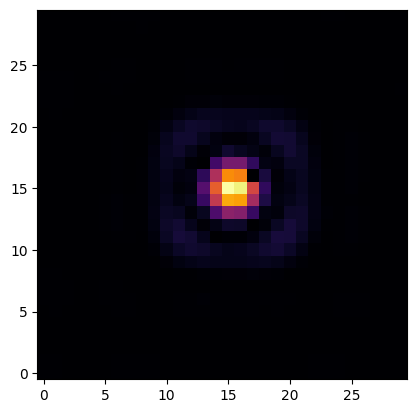

In [13]:
# get brightest pixel coordinates
y,x = np.unravel_index(np.argmax(data),data.shape)
centre = SkyCoord(w.pixel_to_world(x,y), unit='deg') # astropy wants to keep track of units


# use fits_cut because we want WCS metadata cropped appropriately
cutout = fits_cut(fname, centre, 30, single_outfile=False, memory_only=True)[0] 
cropped = cutout[1].data
cropped_image_hdr = cutout[1].header

print(cropped.shape)
plt.imshow(cropped,cmap=cmap,origin='lower');

In [14]:
cutout.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  CUTOUT        1 ImageHDU       145   (30, 30)   float32   


In [15]:
import glob

In [16]:
file = glob.glob("../data/MAST_2024-09-22T03_37_01.724Z/HST/*_asc.fits")[0]

hdul =fits.open(file)
hdul.info()
hdul.close()

Filename: ../data/MAST_2024-09-22T03_37_01.724Z/HST/n8yj23020_asc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  ASC           1 BinTableHDU     47   3R x 7C   [14A, 14A, 1L, 1L, 1E, 1E, 1E]   


In [27]:
[x[0]+"_cal.fits" for x in fits.getdata(file, ext=1)[0:2]]

['n8yj23jqq_cal.fits', 'n8yj23jsq_cal.fits']